# Aula 2 - Bootcamp DataScience 

## Analise Exploratória

### Inicio

Para download do dataset acesse o link abaixo                                                                                    

https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo/downloads/beer-consumption-sao-paulo.zip/2

In [115]:
#Importando os pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


In [127]:
#Lendo os dados
df = pd.read_csv('../data/Consumo_cerveja.csv', decimal = ',', sep = ';')

In [128]:
df.shape

(365, 7)

In [129]:
#plotando os primeiros casos do dataframe
df.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,01/01/2015,27.30,23.9,32.5,0.0,0,25.46
1,02/01/2015,27.02,24.5,33.5,0.0,0,28.97
2,03/01/2015,24.82,22.4,29.9,0.0,1,30.81
3,04/01/2015,23.98,21.5,28.6,1.2,1,29.80
4,05/01/2015,23.82,21.0,28.3,0.0,0,28.90


In [56]:
#Contando valores validos
df.count()

Data                           365
Temperatura Media (C)          365
Temperatura Minima (C)         365
Temperatura Maxima (C)         365
Precipitacao (mm)              365
Final de Semana                365
Consumo de cerveja (litros)    365
dtype: int64

In [57]:
#plotando o tipo de dados
df.dtypes

Data                            object
Temperatura Media (C)          float64
Temperatura Minima (C)         float64
Temperatura Maxima (C)         float64
Precipitacao (mm)              float64
Final de Semana                  int64
Consumo de cerveja (litros)    float64
dtype: object

In [58]:
#printando o nome das colunas
df.columns

Index(['Data', 'Temperatura Media (C)', 'Temperatura Minima (C)',
       'Temperatura Maxima (C)', 'Precipitacao (mm)', 'Final de Semana',
       'Consumo de cerveja (litros)'],
      dtype='object')

In [130]:
#Vamos trocar os nomes das variaveis para facilitar o trabalho
df.columns = ['data', 'media', 'min', 'max', 'precipitacao', 'fds', 'consumo_cerveja']
df.columns

Index(['data', 'media', 'min', 'max', 'precipitacao', 'fds',
       'consumo_cerveja'],
      dtype='object')

In [132]:
#trocar a variavel fds para o tipo object e a data para pd.DateTime
df['fds'] = df['fds'].astype('category')
df['data'] = pd.to_datetime(df['data'])

In [133]:
#Vamos quebrar a data em dia mes e ano
df['ano'] = df['data'].dt.year
df['mes'] = df['data'].dt.month
df['dia'] = df['data'].dt.day

In [65]:
#printando os casos
df.head()

,data,media,min,max,precipitacao,fds,consumo_cerveja,ano,mes,dia
0,2015-01-01,27.30,23.9,32.5,0.0,0,25.46,2015,1,1
1,2015-02-01,27.02,24.5,33.5,0.0,0,28.97,2015,2,1
2,2015-03-01,24.82,22.4,29.9,0.0,1,30.81,2015,3,1
3,2015-04-01,23.98,21.5,28.6,1.2,1,29.80,2015,4,1
4,2015-05-01,23.82,21.0,28.3,0.0,0,28.90,2015,5,1


### Trabalhando com medidas de tendencia central

In [66]:
## Vamos calcular a média do consumo de cerveja
## Primeiro vamos somar todas as linhas da coluna
df['consumo_cerveja'].sum()

9271.7

In [67]:
## Agora vamos contar todos os casos em que temos consumo de cerveja no dataset
df['consumo_cerveja'].count()

365

In [70]:
#Agora vamos dividir a soma do consumo pela media de cerveja
df['consumo_medio'] = df['consumo_cerveja'].sum() / (df['consumo_cerveja'].count())
df.head()

,data,media,min,max,precipitacao,fds,consumo_cerveja,ano,mes,dia,consumo_medio
0,2015-01-01,27.30,23.9,32.5,0.0,0,25.46,2015,1,1,25.401918
1,2015-02-01,27.02,24.5,33.5,0.0,0,28.97,2015,2,1,25.401918
2,2015-03-01,24.82,22.4,29.9,0.0,1,30.81,2015,3,1,25.401918
3,2015-04-01,23.98,21.5,28.6,1.2,1,29.80,2015,4,1,25.401918
4,2015-05-01,23.82,21.0,28.3,0.0,0,28.90,2015,5,1,25.401918


In [71]:
#Se aplicarmos a função mean, também teremos o mesmo resultado
df['consumo_cerveja'].mean()

25.40191780821916

In [72]:
#Vamos calcular a mediana do consumo de cerveja
#Para isto vamos salvar uma lista com todos nossos dados
lista = df['consumo_cerveja']
print(lista)

0      25.46
1      28.97
2      30.81
3      29.80
4      28.90
5      28.22
6      29.73
7      28.40
8      24.89
9      37.94
10     36.25
11     25.74
12     26.99
13     31.83
14     25.72
15     29.94
16     37.69
17     30.52
18     29.27
19     35.13
20     29.13
21     25.80
22     21.78
23     28.35
24     31.09
25     21.52
26     29.97
27     22.60
28     22.70
29     26.85
       ...  
335    30.47
336    28.41
337    29.51
338    32.45
339    32.78
340    23.38
341    27.71
342    27.14
343    22.93
344    30.74
345    29.58
346    29.19
347    28.13
348    28.62
349    21.06
350    24.34
351    27.04
352    32.54
353    30.13
354    24.83
355    26.83
356    26.47
357    31.57
358    26.31
359    21.96
360    32.31
361    26.10
362    22.31
363    20.47
364    22.45
Name: consumo_cerveja, Length: 365, dtype: float64


In [75]:
#Vamos ordenar os valores de forma crescente
lista = lista.sort_values()
print(lista)

202    14.34
183    14.94
151    16.23
169    16.75
130    16.96
251    16.98
250    17.08
174    17.24
132    17.29
47     17.40
231    17.66
270    17.73
238    17.89
120    17.94
127    18.15
186    18.45
207    18.98
203    19.03
131    19.05
111    19.11
165    19.12
126    19.14
246    19.35
175    19.46
139    19.53
208    19.64
182    19.73
118    19.76
188    19.85
35     19.95
       ...  
325    31.93
31     32.06
269    32.18
360    32.31
338    32.45
212    32.47
199    32.47
352    32.54
265    32.59
289    32.67
94     32.71
339    32.78
73     32.87
164    32.98
280    33.18
192    33.30
282    33.33
93     33.45
220    33.52
107    33.82
259    33.93
331    34.38
283    34.50
262    34.70
19     35.13
303    35.78
287    35.86
10     36.25
16     37.69
9      37.94
Name: consumo_cerveja, Length: 365, dtype: float64


In [85]:
#Como temos 365 casos (0 a 364) a mediana sera o valor da posição 182 dos dados ordenados
#Para bucar este valor primeiro teremos que resetar o indice da lista
lista= lista.reset_index()
lista = lista.drop(columns = 'index')
lista.loc[182]

consumo_cerveja    24.87
Name: 182, dtype: float64

In [84]:
#tambem podemos utilizar a função median() para calcular a mediana 
df['consumo_cerveja'].median()

24.87

In [86]:
##Vamos calcular o desvio padrão
#Primeiro calculamos a distancia de cada ponto da media
df['distancia'] = df['consumo_cerveja'] - df['consumo_medio']

In [87]:
# Segundo elevamos a distancia ao quadrado
df['quadrado_distancia'] = df['distancia'] **2

In [88]:
#Somamos o quadrado da distancia
df['quadrado_distancia'].sum()

7044.129657534248

In [89]:
#dividimos pelo numero de casos
df['quadrado_distancia'].sum() / df['quadrado_distancia'].count()

19.298985363107526

In [100]:
#Tiramos a raiz quadrada da distancia
round(np.sqrt(df['quadrado_distancia'].sum() / df['quadrado_distancia'].count()),3)

4.393

In [98]:
#Realizando a mesma operação com o pandas std
round(df['consumo_cerveja'].std(),3)

4.399

In [101]:
df.head()

,data,media,min,max,precipitacao,fds,consumo_cerveja,ano,mes,dia,consumo_medio,distancia,quadrado_distancia
0,2015-01-01,27.30,23.9,32.5,0.0,0,25.46,2015,1,1,25.401918,0.058082,0.003374
1,2015-02-01,27.02,24.5,33.5,0.0,0,28.97,2015,2,1,25.401918,3.568082,12.731211
2,2015-03-01,24.82,22.4,29.9,0.0,1,30.81,2015,3,1,25.401918,5.408082,29.247353
3,2015-04-01,23.98,21.5,28.6,1.2,1,29.80,2015,4,1,25.401918,4.398082,19.343127
4,2015-05-01,23.82,21.0,28.3,0.0,0,28.90,2015,5,1,25.401918,3.498082,12.236579


### Exercicio

#### Calcular a media, mediana e desvio padrão do consumo de cerveja por mês


### Observando a distribuição dos dados

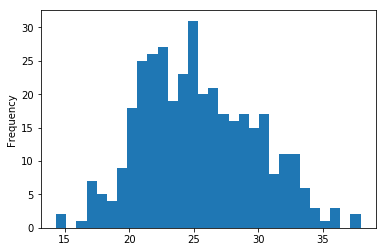

In [146]:
df['consumo_cerveja'].plot.hist(bins = 30)

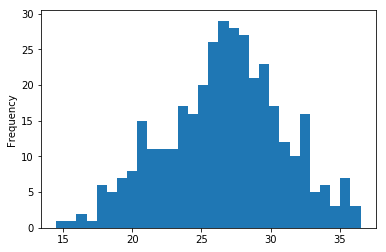

In [147]:
df['max'].plot.hist(bins = 30)

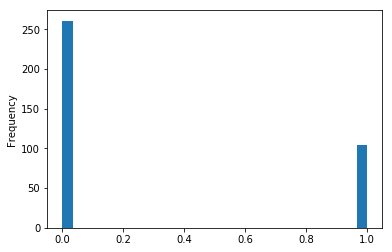

In [150]:
df['fds'].astype('int64').plot.hist(bins = 30)

### Exercicio

#### Fazer a distribuição dos dados das outras variaveis e analisá-las.

### Percentis

In [151]:
#Vamos verificar os valores dos percentis dos dados
np.quantile(df['consumo_cerveja'], 0.70)

27.717999999999996

In [152]:
#Vamos verificar os valores dos percentis dos dados
np.quantile(df['consumo_cerveja'], 0.01)

16.8844

In [153]:
#Visualização dos dados usando o describe
df.describe()

,media,min,max,precipitacao,consumo_cerveja,ano,mes,dia,consumo_medio,distancia,quadrado_distancia,diadasemana
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.0,365.000000,365.000000,3.650000e+02,3.650000e+02,365.000000,365.0
mean,21.226356,17.461370,26.611507,5.196712,25.401918,2015.0,6.526027,15.720548,2.540192e+01,-3.533247e-15,19.298985,3.0
std,3.180108,2.826185,4.317366,12.417844,4.399091,0.0,3.452584,8.808321,5.692145e-14,4.399091e+00,24.387776,2.0
min,12.900000,10.600000,14.500000,0.000000,14.340000,2015.0,1.000000,1.000000,2.540192e+01,-1.106192e+01,0.001019,0.0
25%,19.020000,15.300000,23.800000,0.000000,22.010000,2015.0,4.000000,8.000000,2.540192e+01,-3.391918e+00,2.096942,1.0
50%,21.380000,17.900000,26.900000,0.000000,24.870000,2015.0,7.000000,16.000000,2.540192e+01,-5.319178e-01,11.209654,3.0
75%,23.280000,19.600000,29.400000,3.200000,28.630000,2015.0,10.000000,23.000000,2.540192e+01,3.228082e+00,25.786919,5.0
max,28.860000,24.500000,36.500000,94.800000,37.940000,2015.0,12.000000,31.000000,2.540192e+01,1.253808e+01,157.203505,6.0


In [154]:
df.kurtosis()

media                 -0.414111
min                   -0.569543
max                   -0.290332
precipitacao          17.808397
consumo_cerveja       -0.396501
ano                    0.000000
mes                   -1.207131
dia                   -1.193042
consumo_medio          0.000000
distancia             -0.396501
quadrado_distancia     7.107508
diadasemana           -1.245799
dtype: float64

In [156]:
df.skew()

media                -0.049255
min                  -0.225035
max                  -0.155435
precipitacao          3.780119
consumo_cerveja       0.270375
ano                   0.000000
mes                  -0.010500
dia                   0.007552
consumo_medio         0.000000
distancia             0.270375
quadrado_distancia    2.338906
diadasemana           0.000000
dtype: float64

### Visualização dos dados

#### Hipotese: O final de semana interfere no consumo de cerveja?

In [106]:
# Para validar esta hipotese vamos verificar primeiro quantos dias de final de semana temos na base
# para isso vamos usar a função value counts
df.fds.value_counts()

0    261
1    104
Name: fds, dtype: int64

In [110]:
#vamos ver estatisticas sobre o consumo de cerveja em dias de semana e aos fins de semana
#para isso vamos usar a função groupby
df.groupby('fds')[['consumo_cerveja']].mean()

,consumo_cerveja
fds,
0,23.998736
1,28.923365


In [111]:
#vamos ver estatisticas sobre o consumo de cerveja em dias de semana e aos fins de semana
#para isso vamos usar a função groupby
df.groupby('fds')[['consumo_cerveja']].median()

,consumo_cerveja
fds,
0,23.610
1,29.485


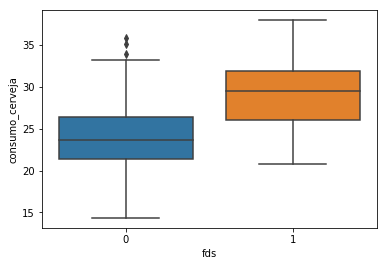

In [113]:
#Vamos plotar o boxplot do consumo de cerevja aos dias de semana e aos finais de semana
sns.boxplot(x = 'fds', y = 'consumo_cerveja', data = df)

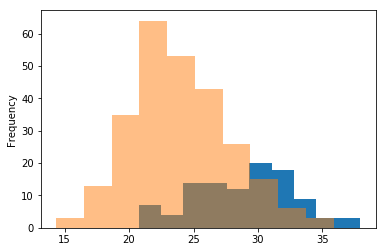

In [121]:
#Vamos plotar os histogramas do consumo de cerveja
df[df['fds'] == 1]['consumo_cerveja'].plot(kind = 'hist')
df[df['fds'] == 0]['consumo_cerveja'].plot(kind = 'hist',alpha = 0.5)

#### Hipotese: Dias quentes (temperatura maxima acima de 29º) influenciam o consumo de cerveja?

In [124]:
## Primeiro vamos criar as labels que nos dirão se o dia está quente ou não
df['labels'] = ['dia_quente' if x > 29 else 'dia_medio' for x in df['max']]

In [126]:
df['labels'].value_counts()

dia_medio     261
dia_quente    104
Name: labels, dtype: int64

In [127]:
df.groupby('labels')[['consumo_cerveja']].mean()

,consumo_cerveja
labels,
dia_medio,24.040996
dia_quente,28.817308


In [128]:
df.groupby('labels')[['consumo_cerveja']].median()    

,consumo_cerveja
labels,
dia_medio,23.54
dia_quente,28.86


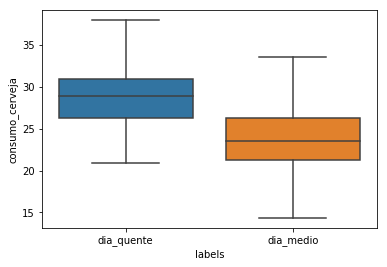

In [129]:
sns.boxplot(x = 'labels', y = 'consumo_cerveja', data = df)

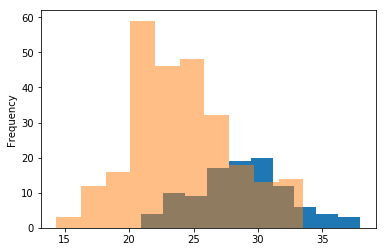

In [132]:
df[df['labels'] == 'dia_quente']['consumo_cerveja'].plot(kind= 'hist')
df[df['labels'] == 'dia_medio']['consumo_cerveja'].plot(kind= 'hist', alpha = 0.5)

### Hipotese: Um final de semana quente aumenta o consumo de cerveja ?

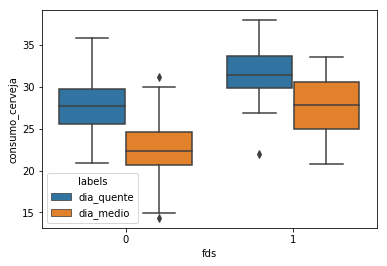

In [133]:
sns.boxplot(x = 'fds', y = 'consumo_cerveja', data = df, hue = 'labels' )

### Hipotese: qual dia de semana interfere mais no consumo de cerveja?

In [134]:
#Vamos criar a variavel dia da semana
df['diadasemana'] = df['data'].dt.dayofweek

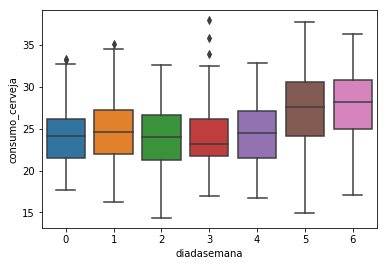

In [138]:
#Vamos criar o boxplot do dia da semana pelo consumo de cerveja
sns.boxplot(x = 'diadasemana', y= 'consumo_cerveja', data = df)

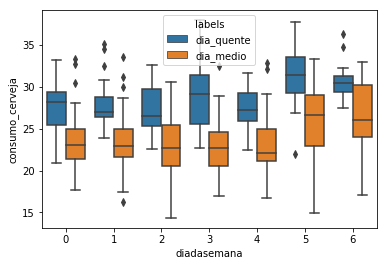

In [139]:
#Vamos adicionar o variavel dia quente para ver se este interefe no consumo de cerveja
sns.boxplot(x = 'diadasemana', y= 'consumo_cerveja', data = df, hue = 'labels')

### Criando a variavel periodo mes e vendo se interefe no consumo de cerveja

In [135]:
df['periodo_mes'] = ['inicio_mes' if x < 15 else 'final_mes' for x in df['dia']]

In [17]:
df.head()

,data,media,min,max,precipitacao,fds,consumo_cerveja,ano,mes,dia,periodo_mes
0,2015-01-01,27.30,23.9,32.5,0.0,0,25.46,2015,1,1,inicio_mes
1,2015-02-01,27.02,24.5,33.5,0.0,0,28.97,2015,2,1,inicio_mes
2,2015-03-01,24.82,22.4,29.9,0.0,1,30.81,2015,3,1,inicio_mes
3,2015-04-01,23.98,21.5,28.6,1.2,1,29.80,2015,4,1,inicio_mes
4,2015-05-01,23.82,21.0,28.3,0.0,0,28.90,2015,5,1,inicio_mes


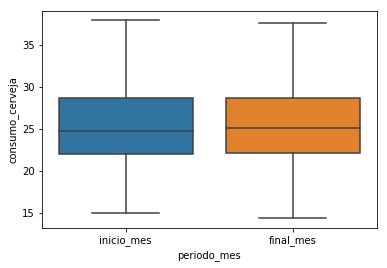

In [18]:
sns.boxplot(x = 'periodo_mes', y = 'consumo_cerveja', data = df)

In [19]:
df.groupby('periodo_mes')[['consumo_cerveja']].mean()

,consumo_cerveja
periodo_mes,
final_mes,25.520711
inicio_mes,25.262619


### Criando a variavel binaria para chuva

In [20]:
df.columns

Index(['data', 'media', 'min', 'max', 'precipitacao', 'fds', 'consumo_cerveja',
       'ano', 'mes', 'dia', 'periodo_mes'],
      dtype='object')

In [136]:
df['chuva'] = ['chuveu' if x > 0 else 'nao_choveu' for x in df['precipitacao']]

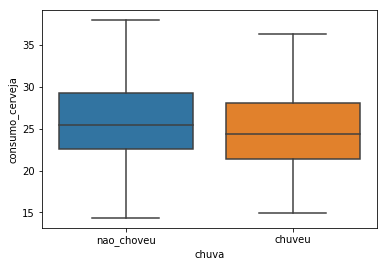

In [24]:
sns.boxplot(x = 'chuva', y = 'consumo_cerveja', data = df)

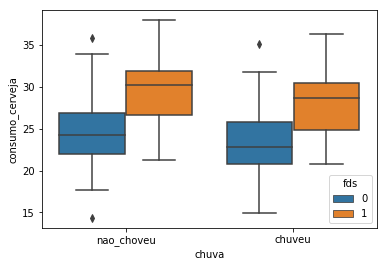

In [38]:
sns.boxplot(x = 'chuva', y= 'consumo_cerveja', data= df, hue = 'fds')

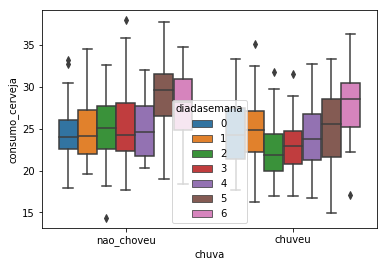

In [40]:
sns.boxplot(x = 'chuva', y= 'consumo_cerveja', data= df, hue = 'diadasemana')

In [25]:
df['chuva'].value_counts()

nao_choveu    218
chuveu        147
Name: chuva, dtype: int64

In [27]:
df['precipitacao'].describe()

count    365.000000
mean       5.196712
std       12.417844
min        0.000000
25%        0.000000
50%        0.000000
75%        3.200000
max       94.800000
Name: precipitacao, dtype: float64

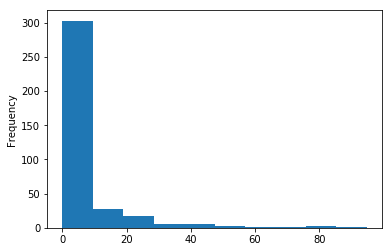

In [28]:
df['precipitacao'].plot.hist()

In [137]:
df['grande_chuva'] = ['chuveu_muito' if x > 10 else 'nao_chuveu_muito' for x in df['precipitacao']]

In [31]:
df['grande_chuva'].value_counts()

nao_chuveu_muito    306
chuveu_muito         59
Name: grande_chuva, dtype: int64

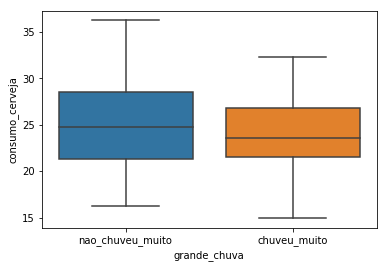

In [34]:
t1 = df[df['chuva'] == 'chuveu']
sns.boxplot(x = 'grande_chuva', y = 'consumo_cerveja', data = t1)

In [36]:
t1.groupby('grande_chuva')[['consumo_cerveja']].mean()

,consumo_cerveja
grande_chuva,
chuveu_muito,24.008136
nao_chuveu_muito,25.027386


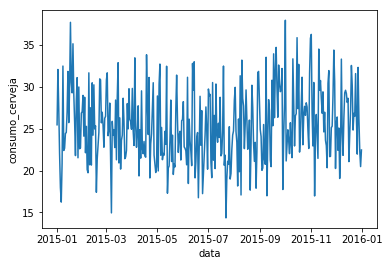

In [42]:
sns.lineplot(x = 'data', y = 'consumo_cerveja', data = df)

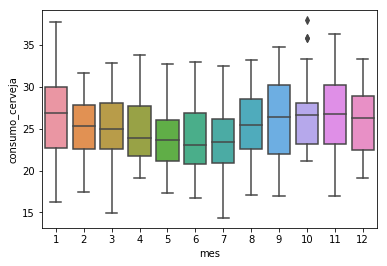

In [45]:
sns.boxplot(x = 'mes', y= 'consumo_cerveja', data = df)

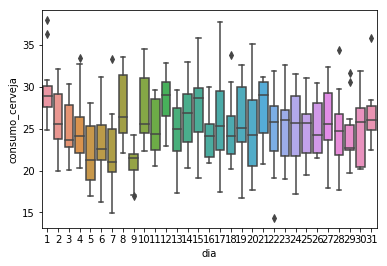

In [48]:
sns.boxplot(x = 'dia', y= 'consumo_cerveja', data = df)

### Dividindo os dados em treino e teste

In [50]:
import catboost

In [51]:
df.columns

Index(['data', 'media', 'min', 'max', 'precipitacao', 'fds', 'consumo_cerveja',
       'ano', 'mes', 'dia', 'periodo_mes', 'chuva', 'grande_chuva',
       'diadasemana'],
      dtype='object')

In [138]:
def get_dia_anterior(df, qtdeDiaAnterior, coluna):
    df = df.set_index(["data"])
    df = df.sort_index()
    df['QtdeDia -'+str(coluna)+str(qtdeDiaAnterior)] = df[coluna].shift(qtdeDiaAnterior)
    df = df.reset_index()        
    return df   

In [139]:
colunas = ['media', 'min', 'max', 'precipitacao', 'fds', 'consumo_cerveja','dia', 'periodo_mes', 'chuva', 'grande_chuva']

In [140]:
df_teste = None
for coluna in colunas:
    for i in range(1,8):
        df = get_dia_anterior(df, i, coluna)
        print(df.columns)
    if df_teste is None:
        df_teste = aux
    else:
        df_teste = df_teste.append(aux)

Index(['data', 'media', 'min', 'max', 'precipitacao', 'fds', 'consumo_cerveja',
       'ano', 'mes', 'dia', 'diadasemana', 'periodo_mes', 'chuva',
       'grande_chuva', 'QtdeDia -media1'],
      dtype='object')
Index(['data', 'media', 'min', 'max', 'precipitacao', 'fds', 'consumo_cerveja',
       'ano', 'mes', 'dia', 'diadasemana', 'periodo_mes', 'chuva',
       'grande_chuva', 'QtdeDia -media1', 'QtdeDia -media2'],
      dtype='object')
Index(['data', 'media', 'min', 'max', 'precipitacao', 'fds', 'consumo_cerveja',
       'ano', 'mes', 'dia', 'diadasemana', 'periodo_mes', 'chuva',
       'grande_chuva', 'QtdeDia -media1', 'QtdeDia -media2',
       'QtdeDia -media3'],
      dtype='object')
Index(['data', 'media', 'min', 'max', 'precipitacao', 'fds', 'consumo_cerveja',
       'ano', 'mes', 'dia', 'diadasemana', 'periodo_mes', 'chuva',
       'grande_chuva', 'QtdeDia -media1', 'QtdeDia -media2', 'QtdeDia -media3',
       'QtdeDia -media4'],
      dtype='object')
Index(['data', 'media', 

Index(['data', 'media', 'min', 'max', 'precipitacao', 'fds', 'consumo_cerveja',
       'ano', 'mes', 'dia', 'diadasemana', 'periodo_mes', 'chuva',
       'grande_chuva', 'QtdeDia -media1', 'QtdeDia -media2', 'QtdeDia -media3',
       'QtdeDia -media4', 'QtdeDia -media5', 'QtdeDia -media6',
       'QtdeDia -media7', 'QtdeDia -min1', 'QtdeDia -min2', 'QtdeDia -min3',
       'QtdeDia -min4', 'QtdeDia -min5', 'QtdeDia -min6', 'QtdeDia -min7',
       'QtdeDia -max1', 'QtdeDia -max2', 'QtdeDia -max3', 'QtdeDia -max4',
       'QtdeDia -max5', 'QtdeDia -max6', 'QtdeDia -max7',
       'QtdeDia -precipitacao1', 'QtdeDia -precipitacao2',
       'QtdeDia -precipitacao3', 'QtdeDia -precipitacao4',
       'QtdeDia -precipitacao5', 'QtdeDia -precipitacao6',
       'QtdeDia -precipitacao7', 'QtdeDia -fds1', 'QtdeDia -fds2',
       'QtdeDia -fds3'],
      dtype='object')
Index(['data', 'media', 'min', 'max', 'precipitacao', 'fds', 'consumo_cerveja',
       'ano', 'mes', 'dia', 'diadasemana', 'periodo_m

Index(['data', 'media', 'min', 'max', 'precipitacao', 'fds', 'consumo_cerveja',
       'ano', 'mes', 'dia', 'diadasemana', 'periodo_mes', 'chuva',
       'grande_chuva', 'QtdeDia -media1', 'QtdeDia -media2', 'QtdeDia -media3',
       'QtdeDia -media4', 'QtdeDia -media5', 'QtdeDia -media6',
       'QtdeDia -media7', 'QtdeDia -min1', 'QtdeDia -min2', 'QtdeDia -min3',
       'QtdeDia -min4', 'QtdeDia -min5', 'QtdeDia -min6', 'QtdeDia -min7',
       'QtdeDia -max1', 'QtdeDia -max2', 'QtdeDia -max3', 'QtdeDia -max4',
       'QtdeDia -max5', 'QtdeDia -max6', 'QtdeDia -max7',
       'QtdeDia -precipitacao1', 'QtdeDia -precipitacao2',
       'QtdeDia -precipitacao3', 'QtdeDia -precipitacao4',
       'QtdeDia -precipitacao5', 'QtdeDia -precipitacao6',
       'QtdeDia -precipitacao7', 'QtdeDia -fds1', 'QtdeDia -fds2',
       'QtdeDia -fds3', 'QtdeDia -fds4', 'QtdeDia -fds5', 'QtdeDia -fds6',
       'QtdeDia -fds7', 'QtdeDia -consumo_cerveja1',
       'QtdeDia -consumo_cerveja2', 'QtdeDia -consum

In [85]:
df.columns

Index(['data', 'media', 'min', 'max', 'precipitacao', 'fds', 'consumo_cerveja',
       'ano', 'mes', 'dia', 'periodo_mes', 'chuva', 'grande_chuva',
       'diadasemana', 'QtdeDia -media1', 'QtdeDia -media2', 'QtdeDia -media3',
       'QtdeDia -media4', 'QtdeDia -media5', 'QtdeDia -media6',
       'QtdeDia -media7', 'QtdeDia -min1', 'QtdeDia -min2', 'QtdeDia -min3',
       'QtdeDia -min4', 'QtdeDia -min5', 'QtdeDia -min6', 'QtdeDia -min7',
       'QtdeDia -max1', 'QtdeDia -max2', 'QtdeDia -max3', 'QtdeDia -max4',
       'QtdeDia -max5', 'QtdeDia -max6', 'QtdeDia -max7',
       'QtdeDia -precipitacao1', 'QtdeDia -precipitacao2',
       'QtdeDia -precipitacao3', 'QtdeDia -precipitacao4',
       'QtdeDia -precipitacao5', 'QtdeDia -precipitacao6',
       'QtdeDia -precipitacao7', 'QtdeDia -fds1', 'QtdeDia -fds2',
       'QtdeDia -fds3', 'QtdeDia -fds4', 'QtdeDia -fds5', 'QtdeDia -fds6',
       'QtdeDia -fds7', 'QtdeDia -consumo_cerveja1',
       'QtdeDia -consumo_cerveja2', 'QtdeDia -consum

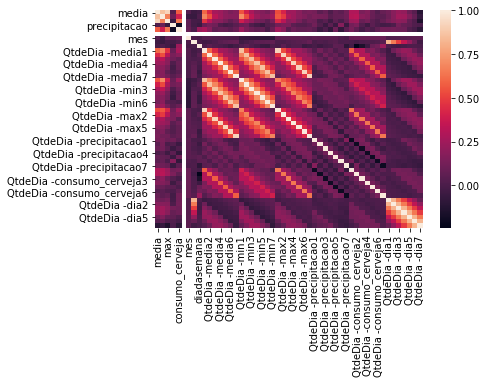

In [87]:
sns.heatmap(df.corr())

In [91]:
df = df.dropna()

In [92]:
df.shape

(358, 84)

In [141]:
df.columns

Index(['data', 'media', 'min', 'max', 'precipitacao', 'fds', 'consumo_cerveja',
       'ano', 'mes', 'dia', 'diadasemana', 'periodo_mes', 'chuva',
       'grande_chuva', 'QtdeDia -media1', 'QtdeDia -media2', 'QtdeDia -media3',
       'QtdeDia -media4', 'QtdeDia -media5', 'QtdeDia -media6',
       'QtdeDia -media7', 'QtdeDia -min1', 'QtdeDia -min2', 'QtdeDia -min3',
       'QtdeDia -min4', 'QtdeDia -min5', 'QtdeDia -min6', 'QtdeDia -min7',
       'QtdeDia -max1', 'QtdeDia -max2', 'QtdeDia -max3', 'QtdeDia -max4',
       'QtdeDia -max5', 'QtdeDia -max6', 'QtdeDia -max7',
       'QtdeDia -precipitacao1', 'QtdeDia -precipitacao2',
       'QtdeDia -precipitacao3', 'QtdeDia -precipitacao4',
       'QtdeDia -precipitacao5', 'QtdeDia -precipitacao6',
       'QtdeDia -precipitacao7', 'QtdeDia -fds1', 'QtdeDia -fds2',
       'QtdeDia -fds3', 'QtdeDia -fds4', 'QtdeDia -fds5', 'QtdeDia -fds6',
       'QtdeDia -fds7', 'QtdeDia -consumo_cerveja1',
       'QtdeDia -consumo_cerveja2', 'QtdeDia -consum

In [142]:
cat_columns = ['QtdeDia -dia1', 'QtdeDia -dia2', 'QtdeDia -dia3', 'QtdeDia -dia4',
       'QtdeDia -dia5', 'QtdeDia -dia6', 'QtdeDia -dia7',
       'QtdeDia -periodo_mes1', 'QtdeDia -periodo_mes2',
       'QtdeDia -periodo_mes3', 'QtdeDia -periodo_mes4',
       'QtdeDia -periodo_mes5', 'QtdeDia -periodo_mes6',
       'QtdeDia -periodo_mes7', 'QtdeDia -chuva1', 'QtdeDia -chuva2',
       'QtdeDia -chuva3', 'QtdeDia -chuva4', 'QtdeDia -chuva5',
       'QtdeDia -chuva6', 'QtdeDia -chuva7', 'QtdeDia -grande_chuva1',
       'QtdeDia -grande_chuva2', 'QtdeDia -grande_chuva3',
       'QtdeDia -grande_chuva4', 'QtdeDia -grande_chuva5',
       'QtdeDia -grande_chuva6', 'QtdeDia -grande_chuva7','QtdeDia -fds1', 'QtdeDia -fds2',
       'QtdeDia -fds3', 'QtdeDia -fds4', 'QtdeDia -fds5', 'QtdeDia -fds6',
       'QtdeDia -fds7','ano', 'dia', 'periodo_mes', 'chuva', 'grande_chuva','fds','diadasemana']

In [143]:
for coluna in cat_columns:
    df[coluna] = df[coluna].astype('category')

In [144]:
df.dtypes

data                         datetime64[ns]
media                               float64
min                                 float64
max                                 float64
precipitacao                        float64
fds                                category
consumo_cerveja                     float64
ano                                category
mes                                   int64
dia                                category
diadasemana                        category
periodo_mes                        category
chuva                              category
grande_chuva                       category
QtdeDia -media1                     float64
QtdeDia -media2                     float64
QtdeDia -media3                     float64
QtdeDia -media4                     float64
QtdeDia -media5                     float64
QtdeDia -media6                     float64
QtdeDia -media7                     float64
QtdeDia -min1                       float64
QtdeDia -min2                   

In [147]:
train_df = df[df['mes'] > 9]
teste_df = df[df['mes'] <= 9]

In [114]:
train_df = df[df['mes'].isin(['10','11','12'])]
teste_df = df[df['mes'].isin(['10', '11','12'])]

KeyError: 'mes'

In [148]:
train_df = train_df.drop(columns = 'mes')
teste_df = teste_df.drop(columns = 'mes')

In [149]:
y_train = train_df['consumo_cerveja']
X_train = train_df.drop(columns = 'consumo_cerveja')
y_test = teste_df['consumo_cerveja']
X_test = teste_df.drop(columns = 'consumo_cerveja')

In [126]:
train_df.columns

Index(['data', 'media', 'min', 'max', 'precipitacao', 'fds', 'consumo_cerveja',
       'ano', 'dia', 'periodo_mes', 'chuva', 'grande_chuva', 'diadasemana',
       'QtdeDia -media1', 'QtdeDia -media2', 'QtdeDia -media3',
       'QtdeDia -media4', 'QtdeDia -media5', 'QtdeDia -media6',
       'QtdeDia -media7', 'QtdeDia -min1', 'QtdeDia -min2', 'QtdeDia -min3',
       'QtdeDia -min4', 'QtdeDia -min5', 'QtdeDia -min6', 'QtdeDia -min7',
       'QtdeDia -max1', 'QtdeDia -max2', 'QtdeDia -max3', 'QtdeDia -max4',
       'QtdeDia -max5', 'QtdeDia -max6', 'QtdeDia -max7',
       'QtdeDia -precipitacao1', 'QtdeDia -precipitacao2',
       'QtdeDia -precipitacao3', 'QtdeDia -precipitacao4',
       'QtdeDia -precipitacao5', 'QtdeDia -precipitacao6',
       'QtdeDia -precipitacao7', 'QtdeDia -fds1', 'QtdeDia -fds2',
       'QtdeDia -fds3', 'QtdeDia -fds4', 'QtdeDia -fds5', 'QtdeDia -fds6',
       'QtdeDia -fds7', 'QtdeDia -consumo_cerveja1',
       'QtdeDia -consumo_cerveja2', 'QtdeDia -consumo_cerve

In [150]:
from catboost import CatBoost, Pool
from catboost import CatBoostRegressor
from catboost import CatBoostClassifier

In [151]:
model_catBoost = CatBoostClassifier(cat_features=cat_columns, random_seed=123)

In [ ]:
model_catBoost.fit(X_train, y_train)

0:	learn: 4.4800150	total: 1m 8s	remaining: 19h 5m 8s
1:	learn: 4.4731861	total: 1m 12s	remaining: 10h 4m 56s
2:	learn: 4.4729539	total: 1m 13s	remaining: 6h 44m 38s
3:	learn: 4.4653974	total: 1m 41s	remaining: 7h 1m 27s
4:	learn: 4.4589956	total: 2m 5s	remaining: 6h 56m 6s
5:	learn: 4.4549409	total: 2m 6s	remaining: 5h 49m 1s
6:	learn: 4.4547171	total: 2m 6s	remaining: 4h 59m 34s
7:	learn: 4.4519331	total: 2m 7s	remaining: 4h 23m 48s
8:	learn: 4.4476362	total: 2m 8s	remaining: 3h 56m 3s
9:	learn: 4.4398297	total: 2m 35s	remaining: 4h 16m 40s
10:	learn: 4.4354859	total: 2m 47s	remaining: 4h 10m 18s
11:	learn: 4.4294210	total: 2m 51s	remaining: 3h 54m 50s
12:	learn: 4.4252169	total: 2m 51s	remaining: 3h 37m 34s
13:	learn: 4.4171129	total: 3m 51s	remaining: 4h 32m 16s
14:	learn: 4.4094380	total: 5m	remaining: 5h 29m 24s
15:	learn: 4.4053219	total: 5m 1s	remaining: 5h 9m 28s
16:	learn: 4.3986192	total: 5m 14s	remaining: 5h 2m 42s
17:	learn: 4.3906915	total: 6m 28s	remaining: 5h 53m 14s
18

143:	learn: 3.8458061	total: 46m 33s	remaining: 4h 36m 45s
144:	learn: 3.8395090	total: 47m 3s	remaining: 4h 37m 29s
145:	learn: 3.8315716	total: 48m 6s	remaining: 4h 41m 22s
146:	learn: 3.8235620	total: 49m 5s	remaining: 4h 44m 50s
147:	learn: 3.8188554	total: 49m 18s	remaining: 4h 43m 48s
148:	learn: 3.8160534	total: 49m 18s	remaining: 4h 41m 40s
149:	learn: 3.8095857	total: 50m 31s	remaining: 4h 46m 16s
150:	learn: 3.8049152	total: 50m 35s	remaining: 4h 44m 27s
151:	learn: 3.7991793	total: 50m 48s	remaining: 4h 43m 25s
152:	learn: 3.7953678	total: 50m 48s	remaining: 4h 41m 18s
153:	learn: 3.7931045	total: 50m 49s	remaining: 4h 39m 13s
154:	learn: 3.7900022	total: 50m 50s	remaining: 4h 37m 10s
155:	learn: 3.7852830	total: 51m 21s	remaining: 4h 37m 51s
156:	learn: 3.7794020	total: 52m 32s	remaining: 4h 42m 6s
157:	learn: 3.7793334	total: 52m 32s	remaining: 4h 40m 1s
158:	learn: 3.7762054	total: 52m 33s	remaining: 4h 38m
159:	learn: 3.7690478	total: 53m 43s	remaining: 4h 42m 2s
160:	le

279:	learn: 2.9383756	total: 2h 22m 59s	remaining: 6h 7m 41s
280:	learn: 2.9296227	total: 2h 24m 6s	remaining: 6h 8m 43s
281:	learn: 2.9211412	total: 2h 24m 53s	remaining: 6h 8m 55s
282:	learn: 2.9126393	total: 2h 25m 49s	remaining: 6h 9m 27s
283:	learn: 2.9042398	total: 2h 26m 37s	remaining: 6h 9m 38s
284:	learn: 2.8958490	total: 2h 27m 30s	remaining: 6h 10m 3s
285:	learn: 2.8875358	total: 2h 28m 17s	remaining: 6h 10m 13s
286:	learn: 2.8790484	total: 2h 29m 27s	remaining: 6h 11m 18s
287:	learn: 2.8705709	total: 2h 30m 23s	remaining: 6h 11m 48s
288:	learn: 2.8623443	total: 2h 31m 28s	remaining: 6h 12m 39s
289:	learn: 2.8538887	total: 2h 32m 14s	remaining: 6h 12m 44s
290:	learn: 2.8453284	total: 2h 33m 5s	remaining: 6h 12m 59s
291:	learn: 2.8368328	total: 2h 34m	remaining: 6h 13m 26s
292:	learn: 2.8285994	total: 2h 35m 8s	remaining: 6h 14m 21s
293:	learn: 2.8201767	total: 2h 35m 54s	remaining: 6h 14m 23s
294:	learn: 2.8118559	total: 2h 36m 54s	remaining: 6h 14m 59s
295:	learn: 2.8032884

In [124]:
y_train

Series([], Name: consumo_cerveja, dtype: float64)